# Daniel Corral
# DSC 530
# Final project

In [163]:
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np

In [164]:
data = pd.read_csv("student-mat.csv")

In [165]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [166]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [167]:
males = data[data.sex == "M"]
females = data[data.sex == "F"]
highDayAlc = data[data.Dalc > 3]
lowDayAlc = data[data.Dalc < 3]
highWeekendAlc = data[data.Walc > 3]
lowWeekendAlc = data[data.Walc < 3]
lowFamSize = data[data.famsize == "LE3"]
highFamSize = data[data.famsize == "GT3"]

In [168]:
"""
for parental education I combined the 2 with 6 being the equivalent
of both parents finishing high school. 
"""
highParentalEducation = data[data.Medu + data.Fedu >= 6]
lowParentalEducation = data[data.Medu + data.Fedu < 6]

In [169]:
lowDayAlc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [170]:
avgScore = round(data["G3"].mean(),1)
avgScore

10.4

In [171]:
maleavgScore = round(males["G3"].mean(),1)
maleavgScore

10.9

In [172]:
femaleavgScore = round(females["G3"].mean(),1)
femaleavgScore

10.0

In [173]:
highDayAlcavgScore  = round(highDayAlc["G1"].mean(),1)
highDayAlcavgScore

10.1

In [174]:
lowDayAlcavgScore  = round(lowDayAlc["G1"].mean(),1)
lowDayAlcavgScore

11.0

In [175]:
highWeekendAlcavgScore  = round(highWeekendAlc["G1"].mean(),1)
highWeekendAlcavgScore

10.0

In [176]:
lowWeekendAlcavgScore  = round(lowWeekendAlc["G1"].mean(),1)
lowWeekendAlcavgScore

11.2

In [177]:
highParentalEducationAvgScore = round(highParentalEducation["G1"].mean(),1)
highParentalEducationAvgScore

11.6

In [178]:
lowParentalEducationAvgScore = round(lowParentalEducation["G1"].mean(),1)
lowParentalEducationAvgScore

10.3

In [179]:
lowFamSizeAvgScore = round(lowFamSize["G1"].mean(),1)
lowFamSizeAvgScore

11.3

In [180]:
highFamSizeAvgScore = round(highFamSize["G1"].mean(),1)
highFamSizeAvgScore

10.8

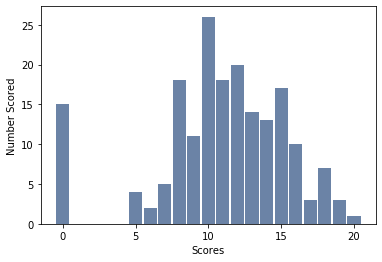

In [181]:
maleHist = thinkstats2.Hist(males.G3, label='Male Scores')
thinkplot.Hist(maleHist)
thinkplot.Config(xlabel='Scores', ylabel='Number Scored')

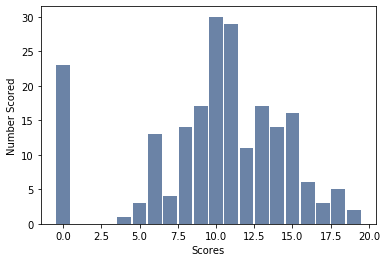

In [182]:
femaleHist = thinkstats2.Hist(females.G3, label='Female Scores')
thinkplot.Hist(femaleHist)
thinkplot.Config(xlabel='Scores', ylabel='Number Scored')

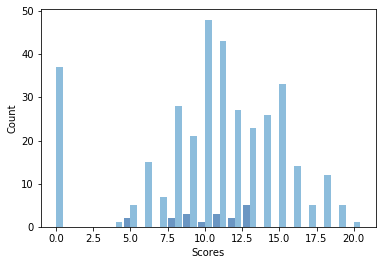

In [183]:
highDailyAlcHist = thinkstats2.Hist(highDailyAlc.G3, label='High Daily Alcohol')
lowDailyAlcHist = thinkstats2.Hist(lowDailyAlc.G3, label='Low Daily Alcohol')
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(highDailyAlcHist, align='right', width=width)
thinkplot.Hist(lowDailyAlcHist, align='left', width=width)
thinkplot.Config(xlabel='Scores', ylabel='Count')

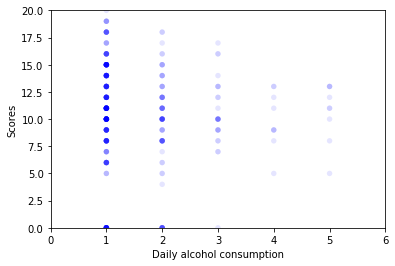

In [184]:
"Scatterplot to see if scores decrease as alcohol consumption increases"

thinkplot.Scatter(data.Dalc, data.G3, alpha=0.1)
thinkplot.Config(xlabel='Daily alcohol consumption',
                 ylabel='Scores',
                 axis=[0, 6, 0, 20],
                 legend=False)

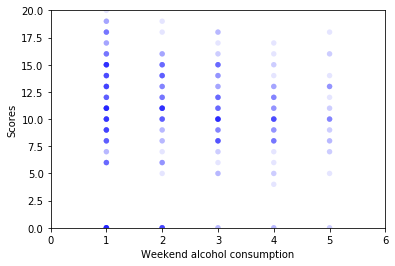

In [185]:
"Scatterplot to see if scores decrease as weekend alcohol consumption increases"

thinkplot.Scatter(data.Walc, data.G3, alpha=0.1)
thinkplot.Config(xlabel='Weekend alcohol consumption',
                 ylabel='Scores',
                 axis=[0, 6, 0, 20],
                 legend=False)

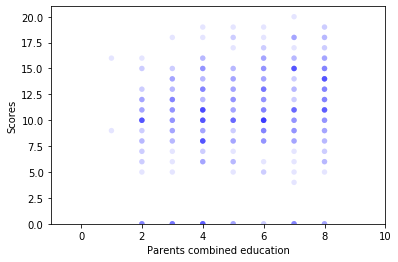

In [186]:
"Scatterplot to see effect of parental education on scores"
bothEdu = data.Medu + data.Fedu
thinkplot.Scatter(bothEdu, data.G3, alpha=.1)
thinkplot.Config(xlabel='Parents combined education',
                 ylabel='Scores',
                 axis=[-1, 10, 0, 21],
                 legend=False)

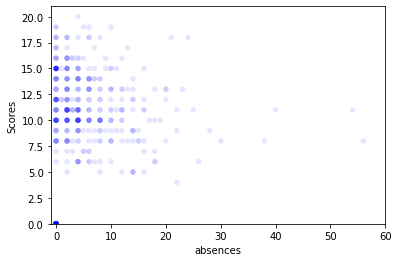

In [187]:
"Scatterplot to see effect of absences on scores"
bothEdu = data.Medu + data.Fedu
thinkplot.Scatter(data.absences, data.G3, alpha=.1)
thinkplot.Config(xlabel='absences',
                 ylabel='Scores',
                 axis=[-1, 60, 0, 21],
                 legend=False)

In [188]:
#Weak correlation showing that as absences increases there is no apparent effect on the score.
data['absences'].corr(data['G3'])

0.03424731615006932

In [126]:
data['absences'].corr(data['G3'], method='spearman') 

0.017730669122425113

In [127]:
data['absences'].corr(data['G3'], method='kendall') 

0.0037225159044700497

In [129]:
outlierFreeAbsences = data[data['absences'].between(0, 30)]

In [144]:
#Tested to see if outliers played a part in the weak correlation and they do not
outlierFreeAbsences['absences'].corr(data['G3']) 

0.07152363360256585

In [145]:
#Weak correlation showing that as Mother's education increases there is slight increase in scores.
data['Medu'].corr(data['G3'])

0.217147496138606

In [146]:
#Weak correlation showing that as Father's education increases there is slight increase in scores.
data['Fedu'].corr(data['G3'])

0.15245693890425902

In [147]:
#Weak negative correlation showing little to no impact on final grades.
data['health'].corr(data['G3'])

-0.06133460487712136

In [155]:
#Weak negative correlation show.
data['Dalc'].corr(data['G3'])

-0.05466004056673598

In [198]:
newCor = data.filter(['G3','Medu','Fedu','Dalc','Walc','absences','age','failures','studytime'], axis=1)

In [199]:
#Table with correlation from the dataframe
newCor.corr(method = 'pearson')

,G3,Medu,Fedu,Dalc,Walc,absences,age,failures,studytime
G3,1.000000,0.217147,0.152457,-0.054660,-0.051939,0.034247,-0.161579,-0.360415,0.097820
Medu,0.217147,1.000000,0.623455,0.019834,-0.047123,0.100285,-0.163658,-0.236680,0.064944
Fedu,0.152457,0.623455,1.000000,0.002386,-0.012631,0.024473,-0.163438,-0.250408,-0.009175
Dalc,-0.054660,0.019834,0.002386,1.000000,0.647544,0.111908,0.131125,0.136047,-0.196019
Walc,-0.051939,-0.047123,-0.012631,0.647544,1.000000,0.136291,0.117276,0.141962,-0.253785
absences,0.034247,0.100285,0.024473,0.111908,0.136291,1.000000,0.175230,0.063726,-0.062700
age,-0.161579,-0.163658,-0.163438,0.131125,0.117276,0.175230,1.000000,0.243665,-0.004140
failures,-0.360415,-0.236680,-0.250408,0.136047,0.141962,0.063726,0.243665,1.000000,-0.173563
studytime,0.097820,0.064944,-0.009175,-0.196019,-0.253785,-0.062700,-0.004140,-0.173563,1.000000
